# 

#### Gautam Borgohain

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None

In [2]:
data_unlab = pd.read_excel('/Users/gautamborgohain/Desktop/Tweets_labeled_325.xlsx')
data_unlab.head()

,Created At,DayWeek,DayYear,Hour,ID,In Reply To,Language,Place,ReTweet Count,Sentiment,Tweet,Unnamed: 2,User Handle,isSwarm
0,2016-03-23 07:58:09,2,83,7,712428180989042048,NaN,en,NaN,11,-1,RT @TODAYonline: TODAY'S TOP STORY: #MRT train...,NaN,vxnnnn,False
2,2016-03-23 07:55:48,2,83,7,712427591685136000,NaN,en,NaN,0,0,"On Facebook, condolences pour forth for 2 SMRT...",NaN,ThinaeshS,False
3,2016-03-23 07:53:36,2,83,7,712427035713404032,NaN,en,NaN,289,-1,RT @ChannelNewsAsia: SMRT's fatal accident nea...,NaN,LforLana,False
6,2016-03-23 07:46:04,2,83,7,712425139594328960,NaN,en,NaN,181,0,RT @TODAYonline: JUST IN: SMRT releases 2 phot...,NaN,vlxhh,False
8,2016-03-23 07:45:34,2,83,7,712425016323778944,NaN,en,NaN,10,-1,RT @TODAYonline: HAPPENING TODAY: #LKY’s 1st d...,NaN,adorenew,False


### Clean the tweets and classify some of the common shorthands used

Replace some of the shorthands, urls and @ symbols with more processable words

In [3]:
import re
def regexStuff(tweet):
    tweet = re.sub(r'@SMRT_singapore|@smrt_singapore|@smrt|@SMRT_Singapore','TARGET',tweet)
    tweet = re.sub(r'@[^ ]*','NOT_TARGET',tweet)
    #Clear the http and other characters that are causing problems
    tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '', tweet)
    tweet = re.sub(r'http?[^ ]+','',tweet)
    tweet = re.sub(r'[\n]','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\.]+', '.', tweet)
    tweet = re.sub('…','',tweet)
    tweet = re.sub('[-—]','',tweet)
    tweet = re.sub(r'&gt;|&amp;|&lt;','',tweet)
    #Substitue common shorthands with the appropriate words for POS tagging and type dependecy to work
    tweet = re.sub(r' u ',' you ',tweet)
    tweet = re.sub(r' n ',' no ',tweet)
    tweet = re.sub(r' y ',' why ',tweet)
    tweet = re.sub(r' nt ',' not ',tweet)
    tweet = re.sub(r' dwn ',' down ',tweet)
    tweet = re.sub(r' frver ',' forever ',tweet)
    tweet = re.sub(r' bc ',' because ',tweet)
    tweet = re.sub(r' bcoz ',' because ',tweet)
    tweet = re.sub(r' cuz ',' because ',tweet)
    tweet = re.sub(r' im ',' I am ',tweet)
    tweet = re.sub(r' zzz ',' sleep ',tweet)
    tweet = re.sub(r' y\'all ',' you all ',tweet)
    #Set the hash tags
    tweet = re.sub(r'#','HASH_',tweet)
    return tweet

In [487]:
## Cell to try out the emoticons and other regex stuff

tweet = 'Our new collaboration with the @SMRT_Singapore Institute: https://t.co/81n93wkoMe @bcrre @eps_unibham @adamtickell https://t.co/nJ2zMsbv2f'
tweet = "RT @ChannelNewsAsia: Singapore footballer hopes #SLeague-SMRT partnership will create more 'media attention' https://t.co/bpKn3i6Hf4 https:…"
# tweet = "ChannelNewsAsia: Football training: FootballSLEAGUE and SMRT_Singapore show off the HASH_SLeague train … "
# tweet = "RT NOT_TARGET🎊.TARGET upping basic salaries of bus captains to be “at least on par with market”"
# tweet = "Hell yeahhh!! (with Emil at TARGET) [pic]  "
# tweet = tweet.encode('ascii')
# print(regexStuff(tweet))
# tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '', tweet)
tweet = re.findall(r'#[^ ]+',tweet)
print(tweet)

['#SLeague-SMRT']


In [4]:
cleanedtweets = [regexStuff(tweet) for tweet in data_unlab['Tweet']]
cleanedtweets[:20] ## Show preview of the cleaned tweets

["RT NOT_TARGET TODAY'S TOP STORY: HASH_MRT train near HASH_PasirRis station kills 2 staff checking on signal alarm ",
 'On Facebook, condolences pour forth for 2 SMRT staff killed in accident ',
 "RT NOT_TARGET SMRT's fatal accident near HASH_PasirRis MRT station: What we know ",
 'RT NOT_TARGET JUST IN: SMRT releases 2 photos illustrating the fatal accident near HASH_PasirRis MRT station ',
 'RT NOT_TARGET HAPPENING TODAY: HASH_LKY’s 1st death anniversary, burial of HASH_SMRT staff killed in accident  more. ',
 'RT NOT_TARGET Some SMRT staff upset over apparent disregard for workers’ safety ',
 'RT NOT_TARGET SMRT FATAL ACCIDENT: Safety protocols under review after 2 staff hit by oncoming train ',
 '2 SMRT staff dead in accident near Pasir Ris station ',
 '"He was the light of any party”: Cousin of one of the victims in SMRT accident ',
 'RT NOT_TARGET Walkway maintenance staff were walking on is 0.5m wide: SMRT ',
 'Some SMRT staff upset over apparent disregard for workers’ safety '

In [5]:
# Put the cleaned tweets to the dataset
data_unlab_copy = data_unlab.copy()
data_unlab_copy['Tweet'] = cleanedtweets

In [38]:
backup = data_unlab_copy.copy()

In [39]:
data_unlab_copy = data_unlab_copy.drop_duplicates(subset = 'Tweet')

In [61]:
data_unlab_copy.to_clipboard()

### Remove the tweets which are automatically generated by the Swarm app

They start with 'I'm at' or have it in content along with an mrt station name

In [40]:
def swarmTweet(tweet):
    tweet = tweet.lower()
    if re.search(r'i\'m at [a-z ]* mrt ', tweet) or tweet.startswith('i\'m at'):
        return True
    else:
        return False
    
data_unlab_copy['isSwarm'] = [swarmTweet(tweet) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy = data_unlab_copy[data_unlab_copy.isSwarm == False]
print(len(data_unlab_copy))

2849


Positive - negative - neutral distribution in the data


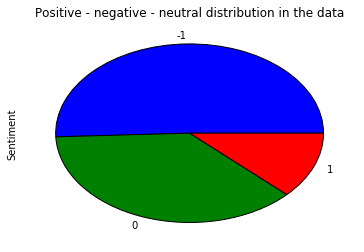

In [41]:
data_unlab_copy.Sentiment.value_counts().plot(kind = "pie",title = "Positive - negative - neutral distribution in the data")

### Some exploration on the dataset

Plot the most frequent words in the dataset

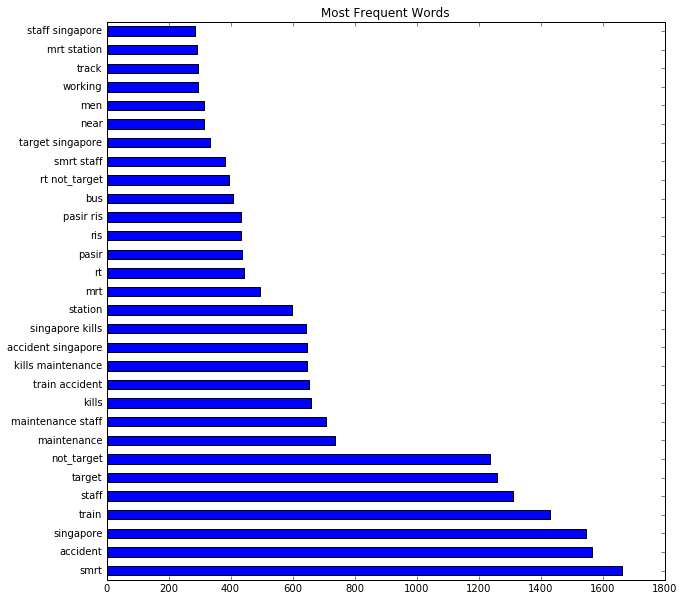

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1,max_df=1.0,stop_words='english',lowercase=True,ngram_range=(1,2))
documentmatrix = vectorizer.fit_transform(data_unlab_copy['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Words',figsize = (10,10))

### Stanford Core NLP dependency tree features

cd stanford-corenlp-full-2015-12-09/

export CLASSPATH="`find . -name '*.jar'`" 

java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

In [9]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [10]:
# Sample output from the Stanford dependency parser

text = ("U guys better wake up ur idea! People pay so much for ur crappy service. People late for work now. ATSMRT")
output = nlp.annotate(text, properties={
        'annotators': 'parse,relation',
        'outputFormat': 'json'
    })
# print(output)
# print(output['sentences'][0]['basic-dependencies'])

Count vectorizer to add feature list to a data frame

In [11]:
def getFeatureDF(feature_list):
    vectorizer = CountVectorizer()
    docmatrix = vectorizer.fit_transform(feature_list).toarray()
    columns = vectorizer.get_feature_names()
    columns = [word.upper() for word in columns]  # uppercasing to avoid conflict of in and other words
    df = pd.DataFrame(data=docmatrix, columns=columns)
    return df

## BOW features

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def getBOWFeatures(frame,n_min,n_max):
    vectorizer = CountVectorizer(min_df=4,max_df = 500,stop_words='english',lowercase=True,ngram_range=(n_min,n_max))
    documentmatrix = vectorizer.fit_transform(frame['Tweet']).toarray()
    columns = vectorizer.get_feature_names()
    bowdf = pd.DataFrame(data=documentmatrix, columns=columns)
    print(len(bowdf.columns))
    return(bowdf)

## Generate target dependent features

------- OLD FUNCTION - to be removed

Commented out the lines for checking target as the dependent 


Very messy code to get related data from two dictionaries- posdict(POS tags) and depdict(type dependency dict). Will optimize it later 

In [ ]:
targets = ['SMRT','smrt','smrt_singapore','SMRT_SINGAPORE','train','mrt','TARGET','people','iPhone']
dependency_feats = []
for tweet in data_unlab_copy['Tweet']:
    tweet = tweet.encode('utf-8')
    output = nlp.annotate(tweet, properties={
        'annotators': 'parse,relation',
        'outputFormat': 'json'
    })
    for i in range(len(output['sentences'])):
        features = []
        posdicts = output['sentences'][i]['tokens']
        depdicts = output['sentences'][i]['basic-dependencies']
        for posdict in posdicts:
            for k in posdict:# Iterate through the POS tag dict and search for a verb 
                if(k == 'pos' and posdict[k] in ['VBG','VB','VBD','VBN','VBP','VBZ']):
                    verb = posdict['word'] #If found a verb then get the word 
                    for depdict in depdicts:
                        if depdict['governorGloss'] == verb: #Iterate through the depdict and look for dependent
        #                     if depdict['dependentGloss'] in targets:# If the verb is targeting the list of targets specified
                                if depdict['dep'] in ['obj','pobj','dobj','iobj','nmod']: #If the dependecy type is that of an object
                                    features.append(verb+'_arg2')
                                elif depdict['dep'] in ['nsubj','dep']:# If dependency relation is a subject
                                    features.append(verb+'_arg1')
                        elif depdict['dependentGloss'] == verb: #Iterate through the depdict and look for governer
        #                     if depdict['governorGloss'] in targets:# If the verb is targeting the list of targets specified
                                if depdict['dep'] in ['obj','pobj','dobj','iobj','nmod']: #If the dependecy type is that of an object
                                    features.append('arg2'+verb)
                                elif depdict['dep'] in ['nsubj','dep']:# If dependency relation is a subject
                                    features.append('arg1_'+verb)
                            
                if(k == 'pos' and posdict[k] in ['JJ','JJR','JJS','NN','NNS','NNP','NNPS']):
                    adjn = posdict['word'] #If found a adjective or noun then get the word 
                    for depdict in depdicts:
                        if depdict['governorGloss'] in targets and depdict['dependentGloss'] == adjn: #Iterate through the depdict and look for dependent
                                    features.append(adjn+'arg1')
                if(k == 'pos' and posdict[k] in ['RB','RBR','RBS']):
                    adverb = posdict['word']
                    for depdict in depdicts:
                        if(depdict['dependentGloss'] == adverb):
                            verb = depdict['governorGloss']
                            for depdict in depdicts:
                                if((depdict['governorGloss'] == verb or depdict['dependentGloss'] == verb) and (depdict['governorGloss'] in targets or depdict['dependentGloss'] in targets)):
                                    features.append('arg_v_'+adverb)
                                    
                                
                                  
                                    
    dependency_feats.append(' '.join(features))
print(len(dependency_feats), len(data_unlab_copy))

In [ ]:
dep_feats = getFeatureDF(dependency_feats)
dep_feats.head()

## Type Dependecy features

- "wi is a transitive verb and T (or any of the extended target) is its object; we generate a feature wi _arg2. "
- "wi is a transitive verb and T (or any of the extended target) is its subject; we generate a feature wi_arg1 "
- "wi is a intransitive verb and T (or any of the extended target) is its subject; we generate a feature wi_it_arg1"
- wi is an adjective or noun and T  is its head; we generate a feature wi_arg1.
- wi is an adjective or noun and it is connected by a copula with T we generate a feature wi_cp_arg1.
- wi is an adjective or intransitive verb ap- pearing alone as a sentence and T appears in the pre- vious sentence; we generate a feature wi_arg. For example, in “John did that. Great!”, “Great” appears alone as a sen- tence, so we generate “great_arg” for the target “John”.
- wi is an adverb, and the verb it modifies has T as its subject; we generate a feature arg1_v_wi. For example, for the target iPhone in the tweet “iPhone works better with the Cell- Band”, we will generate the feature “arg1_v_well”.

(Jiang et al, 2011)


In [13]:
#
# Get the positive- negative word lexicon
#

poshand = open('/Users/gautamborgohain/PycharmProjects/DT_Labs/PLayground/Gautam_Borg/HuLiuLexicon/positive-words.txt')
neghand = open('/Users/gautamborgohain/PycharmProjects/DT_Labs/PLayground/Gautam_Borg/HuLiuLexicon/negative-words.txt')
poslist = []
neglist = []
for line in poshand:
    poslist.append(re.sub(r'\n','',line))
for line in neghand:
    neglist.append(re.sub(r'\n','',line))
print(len(poslist),len(neglist))

poshand.close()
neghand.close()

2006 4783


In [14]:
def posorneg(word):
    if(len(poslist)>0 and len(neglist)>0):
        word = word.lower()
        if word in poslist:
            return 'POSITIVE'
        elif word in neglist:
            return 'NEGATIVE'
        else: return word

In [15]:
targets = ['SMRT','smrt','smrt_singapore','SMRT_SINGAPORE','train','mrt','TARGET','people','LRT','lrt']
verbs = ['VBG','VB','VBD','VBN','VBP','VBZ']
adjnon = ['JJ','JJR','JJS','NN','NNS','NNP','NNPS']
objects = ['obj','pobj','dobj','iobj','nmod']
adverbs = ['RB','RBR','RBS']
subjs = ['nsubj','dep']

#helper functions
def getDependentGloss(dep,word, depToSearch):
    return dep.get('dependentGloss') if dep.get('governorGloss') == word and dep.get('dep') in depToSearch else ''

def getDependentGloss_WithTargets(dep,word):
    return dep.get('dependentGloss') if dep.get('governorGloss') == word and dep.get('dependentGloss') in targets else ''

def isTransitive(verb,depdicts):
    for dep in depdicts:
        if dep.get('governorGloss')  == verb and dep.get('dep') in objects:
            return True        
    return False

# tweet = 'I love iPhone'
# tweet = 'SMRT broke down again. Great!'
# tweet = 'SMRT works better with the Cell- Band'

def getTypeDependencyFeatures(frame):
    dependecyfeatures = []
    for tweet in frame['Tweet']:
        tweet = tweet.encode('utf-8')
        output = nlp.annotate(tweet, properties={
                'annotators': 'parse,relation',
                'outputFormat': 'json'
            })

        features = []
        for i in range(len(output['sentences'])):
            posdicts = output['sentences'][i]['tokens']
            depdicts = output['sentences'][i]['basic-dependencies']
            count = 0
            for pos in posdicts:
                verb = pos.get('word') if pos.get('pos') in verbs else '' # Get Verbs
                if verb != '':
                    if(isTransitive(verb, depdicts)):
                        for dep in depdicts:                  
                            #Rule 1
                            dependent = getDependentGloss(dep,verb,objects)
                            if dependent != '' and dependent in targets:
                                features.append(posorneg(verb)+'_arg2')
                            #Rule 2
                            dependent = getDependentGloss(dep,verb,subjs)
                            if (dependent != '' and dependent in targets):
                                features.append(posorneg(verb)+'_arg1')
                    else:
                        #Rule 3
                        for dep in depdicts:
                            dependent = getDependentGloss(dep,verb,subjs)
                            if dependent != '' and dependent in targets:
                                features.append(posorneg(verb)+'_it_arg1')
                #Rule 4            
                adj_noun = pos.get('word') if pos.get('pos') in adjnon else '' # Get Adjectives and Nouns
                if adj_noun != '':
                    for dep in depdicts:
                        dependent = getDependentGloss_WithTargets(dep,adj_noun)
                        if dependent != '':features.append(posorneg(adj_noun)+'_arg1')
                #Rule 7
                adv = pos.get('word') if pos.get('pos') in adverbs else ''
                if adv != '':    
                    for dep in depdicts:
                        verb = dep.get('governorGloss') if dep.get('dependentGloss') == adv else ''# Get the verb it modifies
                        if verb != '':
                            for dep1 in depdicts:#Loop again and check the target
                                dependent = getDependentGloss_WithTargets(dep1,verb)
                                if dependent != '':
                                    # Rule 8 - negation 
                                    if dep.get('dep') == 'neg':
                                        features.append('arg1_v_neg_'+posorneg(verb))
                                    else:
                                        features.append('arg1_v_'+posorneg(adv))
            #Rule 5
            for dep in depdicts:
                dependent = dep.get('dependentGloss') if i>0 and dep.get('governorGloss') =='ROOT' and len(features)>0 else ''
                if dependent != '' : 
                    for pos in posdicts:
                        if pos.get('word') == dependent and pos.get('pos') in adjnon:
                            features.append(posorneg(dependent)+'_arg')
                # If in the second sentence,for the root, theres is already a target dependent feature in the list 
                #  suggesting that that target appears in the previous snentence  and it is an adjective or noun
                
            
        dependecyfeatures.append(' '.join(features))
    
    isListEmpty = True
    for data in dependecyfeatures:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(dependecyfeatures)
        print('Completed Type Dependency Analysis')
        return df

    else:
         return "No Type Dependency data found"


Trying out the function on a dummy data set with sentences picked from the paper

In [290]:
dumm_df = pd.DataFrame(columns=['Tweet'])
dumm_df['Tweet'] = ['I love iPhone',
             'SMRT broke down again. Great!',
             'SMRT does not work with the Cell- Band',
            'SMRT works better with the Cell- Band']


In [297]:
df= getTypeDependencyFeatures(dumm_df)

Completed Type Dependency Analysis


In [298]:
df

,ARG1_V_AGAIN,ARG1_V_NEG_POSITIVE,ARG1_V_POSITIVE,NEGATIVE_IT_ARG1,POSITIVE_ARG,POSITIVE_ARG1,POSITIVE_ARG2
0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,0
2,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0


## POS Tag features

Function to get the postags for the tweets. Takes the training data frame and returns a data frame with the POS features added

In [16]:
from nltk import pos_tag
from nltk import word_tokenize

def getPOStagfeatures(frame):
    tagsoftweet = []
    reg = re.compile(r'at_user|rt|TARGET,')
    count = 1
    for tweet in frame['Tweet']:
        tweet = re.sub(reg, '', tweet)  # stripping it off stuff
#         print('POS Tagging tweet', count)
        postaggedtweet = pos_tag(word_tokenize(tweet))  # this one is pos atgged..list inside list : token[1] for tag
        tags = []
        for token in postaggedtweet:
            tags.append(token[1])
        tagsoftweet.append(' '.join(tags))
        count += 1
    df = getFeatureDF(tagsoftweet)
    print('Completed POS tagging')
    return df

# Subjectivity and Hashtags

Here we use the subjectivity lexicon and get the prior polarity and the type of the words for each word in the tweet.

Thing to watch out for here is that words can have different polarity based on what part of speech it is. This function takes in the tweets data frame and returns the subjectivity features.

In [17]:
def cleantweet(tweet):
    tweet = re.sub('url|at_user|rt|\.', '', tweet)  ## removing these from the tweets
    return tweet

def getSubjectvityfeatures(frame):

    lexicon = pd.read_csv('/Users/gautamborgohain/PycharmProjects/DataScience/Twitter_target_dependent_SA/subjectivity.csv')
    tweet_tags = []
    count_tweet = 1
    for tweet in frame['Tweet']:
        tweet = cleantweet(tweet)
        typeList = []
        priorpolarityList = []
        count_word = 0  # this counter is for the pos tagging. traces the words in the tweet so that the idrect index of the tag can be accesses
#         print('Performing subjectivity analysis of Tweet ', count_tweet)
        count_tweet += 1
        for word in word_tokenize(tweet):
            result = lexicon[lexicon.word1 == word]
            if len(result) != 0:  # word is there in the lexicon
                if len(result) == 1:  # this case is handling the ones where the there is only one record of the word
                    typeList.append(result.iloc[0][0])
                    priorpolarityList.append(result.iloc[0][5])
                if len(result) > 1:  # this is if there are more than one instances of the word in the lexicon then the pos tag is checked
#                     print('Have to tag POS, Hold On!')
                    poslist = pos_tag(word_tokenize(tweet))#Tag the tweet
                    postag = poslist[count_word][1]#Using the position of the word, find the POS tag
                    if postag in ['NN', 'NNP', 'NNS',
                                  'NNPS']:  # make the POS tags to the format used by the MPQA lexicon
                        postag = 'noun'
                    elif postag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
                        postag = 'verb'
                    elif postag in ['RB', 'RBR', 'RBS']:
                        postag = 'adverb'
                    elif postag in ['JJ', 'JJR', 'JJS']:
                        postag = 'adj'
                    second_result = result[result.pos1 == postag]#get the word-postag combination from the lexicon
                    if len(second_result) != 0:  # this is to check if the pos tag that the word was tagged is there in the lexicon for that word
                        typeList.append(second_result.iloc[0][0])
                        priorpolarityList.append(second_result.iloc[0][5])

            count_word += 1

        tweet_tags.append(' '.join(typeList) + ' ' + ' '.join(priorpolarityList))

    isListEmpty = True
    for data in tweet_tags:
        if (data != " "):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(tweet_tags)
        print('Completed Subjective Analysis')
        return df

    else:
         return "No Subjectivity data found"

Some more feature (State of art)? 

- Get the hash tags in the tweets and add them as features - Polarity hash tags is usually consistent across tweets
- Get the adjectives in the tweet which has the target keywords and add them as features

In [18]:
def get_hastags(tweet):
    hash_tags = re.findall('HASH_([^ ]*)', tweet)
    return hash_tags

def getAdjectives(tweet):
    poslist = pos_tag(word_tokenize(tweet))
    adjectives = []
    for pos in poslist:
        if pos[1] in ['JJ', 'JJR', 'JJS']:
            adjectives.append(pos[0])
            
    return adjectives
            

def getTargetFeatures(frame):
    tweet_target_features = []
    for tweet in frame['Tweet']:
        tweet = cleantweet(tweet)
        tags = get_hastags(tweet)
        keywords = ['SMRT', 'mrt','lrt','LRT', 'MRT', 'smrt', 'Singapore_MRT',"TARGET"]
        tokens = word_tokenize(tweet)  
        targets_feature = []
        for keyword in keywords:
            if keyword in tags:  
                feature = keyword + '_hash'
                targets_feature.append(feature)
            if keyword in tokens:
                adjectives = getAdjectives(tweet)  # This will get all the adjectives, not just one
                features = []
                for adjective in adjectives:
                    adjective = re.sub('-', '_',
                                       adjective)  # this to take care of probelesm for - like east-west/ north-south.. now east_west
                    features.append(keyword + '_' + adjective)
                feature = ' '.join(features)
                targets_feature.append(feature)

        tweet_target_features.append(' '.join(targets_feature))
#     print('features:',tweet_target_features)

    isListEmpty = True
    for data in tweet_target_features:
        if (data != ''):
            isListEmpty = False

    if(not isListEmpty):
        df = getFeatureDF(tweet_target_features)
        print("Complete target features")
        return df
    else:
         return "No Target dependant data found"

## Hiu and Lu lexicon features

Get the total number of positive and negative words that are there in the tweets from this lexicon.

Using the poslist and the neglist obtained earlier

In [19]:
# %%timeit

def getPositiveWordCount(tweet):
    countPos = 0
    for word in word_tokenize(tweet):
        if len(word)>=2 and word in poslist: countPos+=1
    return countPos

def getNegativeWordCount(tweet):
    countNeg = 0
    for word in word_tokenize(tweet):
        if len(word)>=2 and word in neglist: countNeg+=1
    return countNeg


In [42]:
data_unlab_copy.to_clipboard()

In [43]:
data_unlab_copy['POSITVE_LEX'] = [getPositiveWordCount(tweet) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['NEGATIVE_LEX'] = [getNegativeWordCount(tweet) for tweet in data_unlab_copy['Tweet']]


## Punctuation features

In [44]:
data_unlab_copy['PUNC_EXCL'] = [len(re.findall(r'!',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['PUNC_QUES'] = [len(re.findall(r'\?',tweet)) for tweet in data_unlab_copy['Tweet']]

## Emoticon features

In [45]:
data_unlab_copy['EMOT_HAPPY'] = [len(re.findall(r':-D|:D|:-\)|:\)',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['EMOT_SAD'] = [len(re.findall(r':-\(|:\(',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['EMOT_WINK'] = [len(re.findall(r';-\)|;\)',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['ANGRY_EMO'] = [len(re.findall(r'\U0001F621|\U0001F624|\U0001F63E|\U0001F449|\U0001F44A',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['LOVE_EMO'] = [len(re.findall(r'\U0001F618|\U0001F61A|\U0001F63B|\U0001F63D',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['HAPPY_EMO'] = [len(re.findall(r'\U0001F602|\U0001F603|\U0001F604|\U0001F605|\U0001F606|\U0001F609|\U0001F60A|\U0001F60B|\U0001F60C|\U0001F60D|\U0001F60F|\U0001F612|\U0001F61C|\U0001F61D|\U0001F638|\U0001F639|\U0001F63A|\U0001F63C|\U0001F44C|\U0001F44D|\U0001F44F|\U0001F450|\U0001F451|\U0001F600|\U0001F607|\U0001F608|\U0001F60E|\U0001F617|\U0001F619|\U0001F61B|\U0001f917|\U0001f595|\U0001f389|\U0001f38a',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['NEUTRAL_EMO'] = [len(re.findall(r'U0001F601|\U0001F633|\U0001F645|\U0001F646|\U0001F647|\U0001F648|\U0001F649|\U0001F64A|\U0001F64B|\U0001F64C|\U0001F64D|\U0001F64E|\U0001F64F|\U0001F448|\U0001F44B|\U0001F610|\U0001F611|\U0001F615|\U0001F62C|\U0001F636',tweet)) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy['SAD_EMO'] = [len(re.findall(r'\U0001F613|\U0001F614|\U0001F616|\U0001F61E|\U0001F620|\U0001F622|\U0001F623|\U0001F625|\U0001F628|\U0001F629|\U0001F62A|\U0001F62B|\U0001F62D|\U0001F630|\U0001F631|\U0001F632|\U0001F635|\U0001F637|\U0001F63F|\U0001F640|\U0001F44E|\U0001f634|\U0001F61F|\U0001F626|\U0001F627|\U0001F62E|\U0001F62F|\U0001F634',tweet)) for tweet in data_unlab_copy['Tweet']]


# SVM classifier for sentiment detection

The default detting of the SVM classifier is used to enable comparision with other work

In [23]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_curve, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import cross_validation

import matplotlib.pyplot as plt

    
def Classify(data,perc):
    classifier = LinearSVC()
    # Seperate data to training and test set
    training_set = data.sample(frac = perc, random_state=0)
    print("Training set size : ", len(training_set))
    testing_set = data.loc[~data.index.isin(training_set.index)]
    print("Testing set size : ", len(testing_set),"\n")
    # Seperate the target from the df which will be used for training and testing
    target_training = training_set['Sentiment']
    target_testing = testing_set['Sentiment']
    training_set.drop('Sentiment',axis = 1,inplace = True)
    testing_set.drop('Sentiment',axis = 1,inplace = True) 
    print("Number of features used in training: ", len(training_set.columns))
    
    #Train classifier
    classifier.fit(training_set, target_training) 
    #Predict on the training data
    predictions_training = classifier.predict(training_set)
    #Predict on the testing data
    predictions_testing = classifier.predict(testing_set)

    # Calculate the accuracy
    accuracy_training = accuracy_score(target_training, predictions_training)
    accuracy_testing = accuracy_score(target_testing, predictions_testing)

    
    #Plot the most informative features
    Negative = pd.DataFrame({'Scores':classifier.coef_[0],'Variables':training_set.columns})
    Negative.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False,title = "Negative words")
    Positive = pd.DataFrame({'Scores':classifier.coef_[2],'Variables':training_set.columns})
    Positive.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False, title = "Positive words")
    Neutral = pd.DataFrame({'Scores':classifier.coef_[1],'Variables':training_set.columns})
    Neutral.sort(columns='Scores',ascending=False)[0:15].plot(x = 'Variables', y = 'Scores',kind = "barh", legend = False, title = "Neutral words")
    
    #Cross validation
    X = training_set.as_matrix(columns = None)
    y = target_training.as_matrix(columns = None)

    cv_scores = cross_validation.cross_val_score(classifier, X, y, cv=10)

    #Print the accuracy, cross validation scores and the crosstab of the predictions 
    print("Accuracy on the training data : ", accuracy_training)
    print("Cross Validation Accuracy scores - ",cv_scores)
    print("Cross Validation Accuracy - Training set: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
    print("Accuracy on the testing data : ", accuracy_testing, "\n")
    print("Training data Crosstab: \n", pd.crosstab(target_training, predictions_training))
    print("Testing data Crosstab: \n", pd.crosstab(target_testing, predictions_testing), "\n")
    
    #Plot the ROC curve
    
    y_score = classifier.fit(training_set, target_training).decision_function(testing_set)
    target_testting_dummies = pd.get_dummies(target_testing)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(target_testting_dummies[target_testting_dummies.columns[i]], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt.plot(fpr[2], tpr[2], label='Positive ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot(fpr[0], tpr[0], label='Negative ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot(fpr[1], tpr[1], label='Neutral ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    
    return classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set

# Call the functions created and add the features

In [56]:
# The BOW function takes argument for the ngram generation
dfBow = getBOWFeatures(data_unlab_copy,1,4) #Prints out the number of BOW features generated

3534


In [46]:
dfSubj= getSubjectvityfeatures(data_unlab_copy)
dfPOS= getPOStagfeatures(data_unlab_copy)
dfTarg = getTargetFeatures(data_unlab_copy)

Completed Subjective Analysis
Completed POS tagging
Complete target features


In [47]:
dep_feats2 = getTypeDependencyFeatures(data_unlab_copy)

Completed Type Dependency Analysis


## Combine all the features

In [57]:
import numpy as np
data_unlab_copy.index = np.arange(len(data_unlab_copy))# Need to reindex to join properly
data = dfBow.join(dfSubj).join(dfPOS).join(dfTarg).join(dep_feats2)
data = data.join(data_unlab_copy['POSITVE_LEX'])
data = data.join(data_unlab_copy['NEGATIVE_LEX'])
data = data.join(data_unlab_copy['PUNC_QUES'])
data = data.join(data_unlab_copy['PUNC_EXCL'])
data = data.join(data_unlab_copy['EMOT_HAPPY'])
data = data.join(data_unlab_copy['EMOT_SAD'])
data = data.join(data_unlab_copy['EMOT_WINK'])
data = data.join(data_unlab_copy['ANGRY_EMO'])
data = data.join(data_unlab_copy['SAD_EMO'])
data = data.join(data_unlab_copy['LOVE_EMO'])
data = data.join(data_unlab_copy['HAPPY_EMO'])
data = data.join(data_unlab_copy['Sentiment'])

In [54]:
len(data.columns)

1538

In [53]:
# Without the BOW features
data = dfSubj.join(dfPOS).join(dfTarg).join(dep_feats2)
data = data.join(data_unlab_copy['POSITVE_LEX'])
data = data.join(data_unlab_copy['NEGATIVE_LEX'])
data = data.join(data_unlab_copy['PUNC_QUES'])
data = data.join(data_unlab_copy['PUNC_EXCL'])
data = data.join(data_unlab_copy['EMOT_HAPPY'])
data = data.join(data_unlab_copy['EMOT_SAD'])
data = data.join(data_unlab_copy['EMOT_WINK'])
data = data.join(data_unlab_copy['ANGRY_EMO'])
data = data.join(data_unlab_copy['SAD_EMO'])
data = data.join(data_unlab_copy['LOVE_EMO'])
data = data.join(data_unlab_copy['HAPPY_EMO'])
data = data.join(data_unlab_copy['Sentiment'])

In [191]:
#Backup the dfs to avoid running them again and again while experimenting
dfBow_backup = dfBow.copy()
dfSubj_backup = dfSubj.copy()
dfPOS_backup = dfPOS.copy()
dfTarg = dfTarg.copy()
data_backup = data_unlab_copy.copy()
dep_feats_backup = dep_feats2.copy()
#Write excel files to reuse them between sessions
dfBow.to_excel('/Users/gautamborgohain/Desktop/BOW.xlsx')
dfSubj.to_excel('/Users/gautamborgohain/Desktop/SUBJ.xlsx')
dfPOS.to_excel('/Users/gautamborgohain/Desktop/POS.xlsx')
dfTarg.to_excel('/Users/gautamborgohain/Desktop/TARG.xlsx')
dep_feats2.to_excel('/Users/gautamborgohain/Desktop/DEPF.xlsx')
#Backup this as well
data.to_excel('/Users/gautamborgohain/Desktop/DATA.xlsx')

### Commands to read from backed up data

In [ ]:
#Read from the backed up data when needed
import pandas as pd
data = pd.read_excel('/Users/gautamborgohain/Desktop/DATA.xlsx')

In [38]:
# dfBow= pd.read_excel('/Users/gautamborgohain/Desktop/BOW.xlsx')
dfSubj= pd.read_excel('/Users/gautamborgohain/Desktop/DATA/processed/SUBJ.xlsx')
dfPOS= pd.read_excel('/Users/gautamborgohain/Desktop/DATA/processed/POS.xlsx')
dfTarg= pd.read_excel('/Users/gautamborgohain/Desktop/DATA/processed/TARG.xlsx')
dep_feats2 = pd.read_excel('/Users/gautamborgohain/Desktop/DATA/processed/DEPF.xlsx')

# Call the SVM classifier to test performance

Training set size :  766
Testing set size :  510 

Number of features used in training:  950
Accuracy on the training data :  0.926892950392
Cross Validation Accuracy scores -  [ 0.71794872  0.74358974  0.75641026  0.79220779  0.76623377  0.76623377
  0.65789474  0.78666667  0.72        0.72      ]
Cross Validation Accuracy - Training set: 0.74 (+/- 0.08)
Accuracy on the testing data :  0.733333333333 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         342   21    4
 0           7  244    5
 1           6   13  124
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         169   36  12
 0          33  147   4
 1          21   30  58 



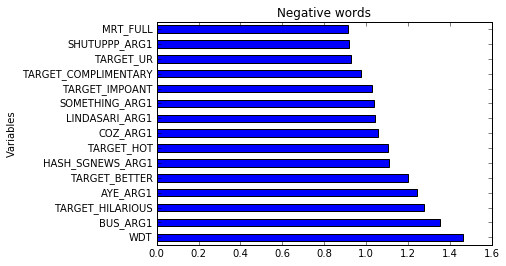

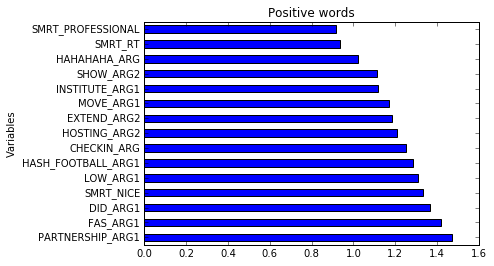

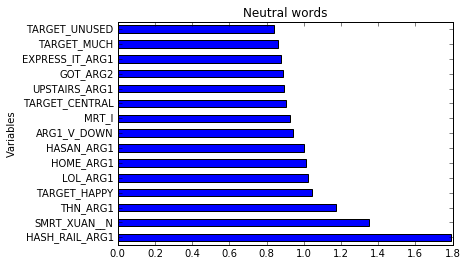

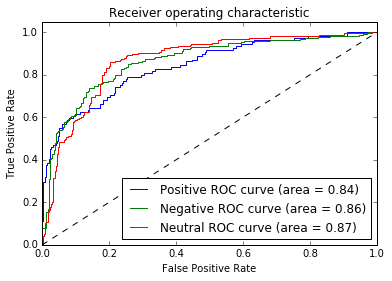

In [545]:
# Call our classifier and check accuracy!!!
import warnings
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.6)

Optimal number of features : 105


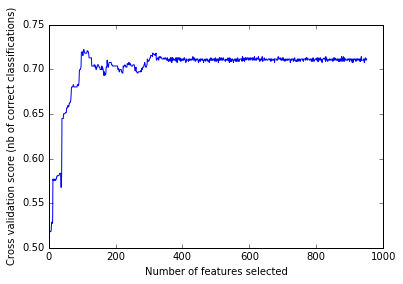

In [548]:
#Recursive feature extractionwith cross validation

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features

y = target_training.as_matrix(columns=None)
X = training_set.as_matrix(columns=None)

# Create the RFE object and compute a cross-validated score.
svc = LinearSVC()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Training set size :  1709
Testing set size :  1140 

Number of features used in training:  5071
Accuracy on the training data :  0.988882387361
Cross Validation Accuracy scores -  [ 0.79651163  0.76744186  0.77906977  0.80116959  0.77192982  0.71345029
  0.80701754  0.81176471  0.73529412  0.76331361]
Cross Validation Accuracy - Training set: 0.77 (+/- 0.06)
Accuracy on the testing data :  0.762280701754 

Training data Crosstab: 
 col_0       -1    0    1
Sentiment               
-1         890    9    0
 0           9  608    0
 1           0    1  192
Testing data Crosstab: 
 col_0       -1    0   1
Sentiment              
-1         449   84  11
 0          91  335  19
 1          23   43  85 



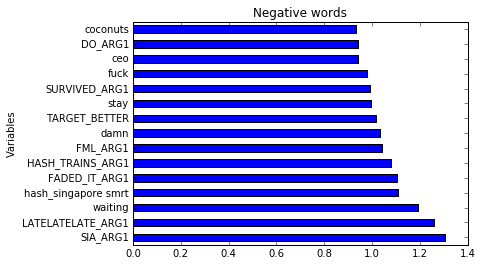

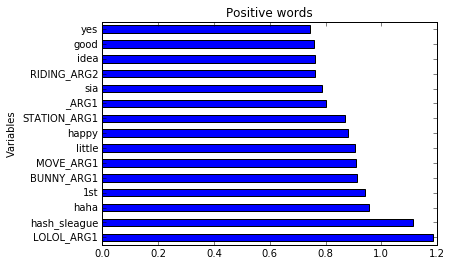

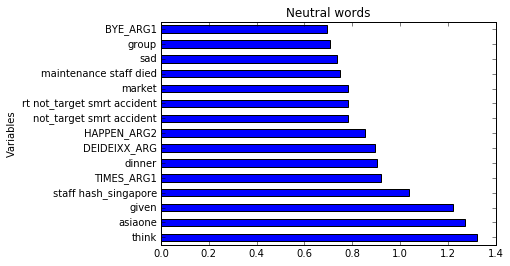

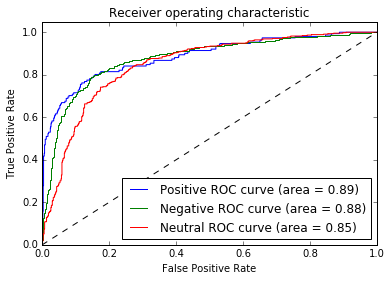

In [58]:
# Call our classifier and check accuracy!!!
import warnings
warnings.filterwarnings('ignore')
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(data, 0.6)

In [551]:
len(training_set.columns)

950

In [567]:
colindex = training_set[rfecv.ranking_].columns[0:105]

In [568]:
colindex

Index(['TARGET_DUN', 'TARGET_SOCIAL', 'TARGET_TAUGHT', 'TARGET_SHALL',
       'ALLOWS_ARG1', 'TARGET_PATHETIC', 'TARGET_HIGHER', 'TARGET_NONENGLISH',
       'NEUTRAL', 'LRT_EXTERN',
       ...
       'NEUTRAL', 'TARGET_STIL', 'TARGET_RED', 'FAS_ARG1', 'TARGET_DOCUMENT',
       'NEUTRAL', 'SMRT_U', 'HASH_CAREER_ARG1', 'HARHH_ARG', 'TARGET_RECENT'],
      dtype='object', length=105)

In [570]:
copy = data[colindex]

In [577]:
copy = copy.join(data['Sentiment'])

In [ ]:
classifier,target_training,target_testing,predictions_training,predictions_testing,training_set,testing_set= Classify(copy, 0.6)

In [ ]:
# Just trying this out with the xgboost classifier
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

import xgboost as xgb
y = np.ravel(data.Sentiment)
X = data.drop('Sentiment', axis = 1,inplace= False)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.40, random_state=0)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,Y_train)

from sklearn import metrics
predicted = xgb_model.predict(X_test)       
print("Accuracy : ",metrics.accuracy_score(Y_test, predicted))

from sklearn import cross_validation
scores = cross_validation.cross_val_score(xgb_model, X_test, Y_test, cv=5)
print("Cross Validation Mean accuracy: ",scores.mean())



# Accuracy :  0.698630136986
# Cross Validation Mean accuracy:  0.712090164558


In [ ]:
from sklearn.learning_curve import learning_curve
title = 'Learning Curves (SVM, linear kernel, $\gamma=%.6f$)' %classifier.best_estimator_.gamma
estimator = SVC(kernel='linear', gamma=classifier.best_estimator_.gamma)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv)
plt.show()

In [60]:
%whos

Variable                        Type               Data/Info
------------------------------------------------------------
Classify                        function           <function Classify at 0x127e337b8>
CountVectorizer                 type               <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
LinearSVC                       type               <class 'sklearn.svm.classes.LinearSVC'>
StanfordCoreNLP                 type               <class 'pycorenlp.corenlp.StanfordCoreNLP'>
accuracy_score                  function           <function accuracy_score at 0x1272dd378>
adjnon                          list               n=7
adverbs                         list               n=3
auc                             function           <function auc at 0x12719aae8>
backup                          DataFrame                        Created At <...>n[3957 rows x 26 columns]
classification_report           function           <function classification_report at 0x1272dd9d8>
classifier